# Who is impacted by homelessness?
Aim: To identify the demographic which is impacted by homelessness.
1. Obtain the number of homelessness clients over time. Determine whether there has been an increase in homelessness over time.
2. Obtain data which shows the number of clients per age group. Create a bar chart to display this.
3. Obtain data which shows the cultural background of clients. Create a pie chart to display this.

In [1]:
#Import dependencies
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Read csv with homeless numbers
data_df = pd.read_csv("Resources/aihw-hou-321-SHS-data-tables_Aug-2021.csv")
data_df

,Table of contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"SHS clients, by state/territory, age group and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Month,Sex,Age group,NSW,Vic,Qld,WA,SA,Tas,ACT,NT,National
3,JUN21,Female,0–4 years,"1,179","1,218",720,315,259,59,86,140,"3,972"
4,JUN21,Female,5–9 years,964,"1,100",632,215,216,45,85,130,"3,384"
...,...,...,...,...,...,...,...,...,...,...,...,...
2304,JUL17,Total,60–64 years,416,694,181,119,86,52,25,82,"1,654"
2305,JUL17,Total,65+ years,476,"1,178",188,163,80,65,23,82,"2,254"
2306,JUL17,Total,All Ages,"22,016","30,510","10,650","5,932","6,308","2,270","1,606","2,895","81,977"
2307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Clean dataframe
#drop NA
clean_df = data_df.dropna(how = "any")
#Set column headers and reset index
clean_df.columns = clean_df.iloc[0]
clean_df = clean_df.drop([2]).reset_index(drop = True)
#Convert date to datetime format
clean_df["Date"] = pd.to_datetime(clean_df["Month"], format = "%b%y")
#Remove all unwanted columns
clean_df = clean_df.drop(["NSW", "Vic", "Qld", "SA", "Tas", "ACT", "NT", "National", "Month"],axis = 1)
#Rename columns
clean_df = clean_df.rename(columns = {"WA": "Homeless clients"})
#Convert homeless clients to float
clean_df["Homeless clients"] = (clean_df["Homeless clients"].str.split()).apply(lambda x: float(x[0].replace(",", "")))
clean_df = clean_df.astype({"Homeless clients": "float"})
clean_df

2,Sex,Age group,Homeless clients,Date
0,Female,0–4 years,315.0,2021-06-01
1,Female,5–9 years,215.0,2021-06-01
2,Female,10–14 years,229.0,2021-06-01
3,Female,15–17 years,230.0,2021-06-01
4,Female,18–19 years,204.0,2021-06-01
...,...,...,...,...
2299,Total,50–54 years,305.0,2017-07-01
2300,Total,55–59 years,174.0,2017-07-01
2301,Total,60–64 years,119.0,2017-07-01
2302,Total,65+ years,163.0,2017-07-01


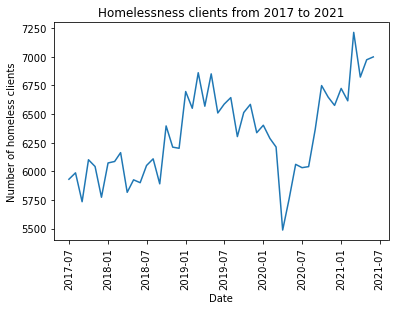

In [4]:
#Plot change in homeless clients over time
monthly_df = clean_df[["Date", "Homeless clients"]].loc[clean_df["Age group"] == "All Ages"].reset_index(drop = True)
plt.plot(monthly_df["Date"], monthly_df["Homeless clients"])
plt.xticks(rotation = 90)
plt.title("Homelessness clients from 2017 to 2021")
plt.xlabel("Date")
plt.ylabel("Number of homeless clients")
plt.savefig("homeless_clients.png")
plt.show()

# Observations
1. The number of homelessness clients has increased from approximately 6000 to over 7000 since 2017. 
2. The dip in homelessness clients in early 2020 was due to COVID-19, however these numbers increased once social distancing restrictions eased.

In [26]:
age_df = clean_df
age_df = clean_df.loc[((clean_df["Sex"] == "Female")
                      | (clean_df["Sex"] == "Male"))
                      & (clean_df["Age group"] != "All Females")
                      & (clean_df["Age group"] != "All Males")
                      & (clean_df["Date"] == "2021-06-01")                      
            ]
age_df

2,Sex,Age group,Homeless clients,Date
0,Female,0–4 years,315.0,2021-06-01
1,Female,5–9 years,215.0,2021-06-01
2,Female,10–14 years,229.0,2021-06-01
3,Female,15–17 years,230.0,2021-06-01
4,Female,18–19 years,204.0,2021-06-01
5,Female,20–24 years,440.0,2021-06-01
6,Female,25–29 years,465.0,2021-06-01
7,Female,30–34 years,572.0,2021-06-01
8,Female,35–39 years,570.0,2021-06-01
9,Female,40–44 years,453.0,2021-06-01


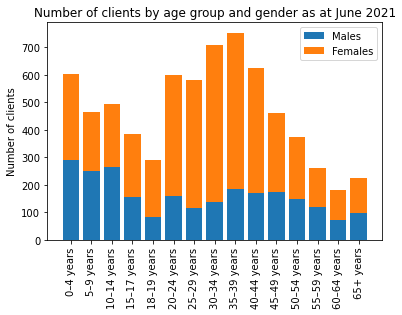

In [47]:
#Create stacked bar chart, visualising the number of clients by age group and gender
male = age_df[["Age group","Homeless clients"]].loc[age_df["Sex"] == "Male"]
female = age_df[["Age group","Homeless clients"]].loc[age_df["Sex"] == "Female"]

fig, ax = plt.subplots()

ax.bar(male["Age group"], male["Homeless clients"], label = "Males")
ax.bar(female["Age group"], female["Homeless clients"], label = "Females", bottom = male["Homeless clients"])

ax.set_title("Number of clients by age group and gender as at June 2021")
ax.set_ylabel("Number of clients")
plt.xticks(rotation = 90)
ax.legend()

plt.show()

# Observations
1. Females outweigh males in all age groups
2. The largest age-groups of homeless clients is adults aged 30-39, followed by young adults aged 20-29 and children aged 0-4. 
3. The rate of homelessness decreases from 0-4 to 18-19, then increases once the person reaches adult-hood. 
4. The rate of homelessness decreases after age 40, once the person has reached mature-age.

In [7]:
#Read csv with indigenous numbers
indigenous_df = pd.read_csv("Resources/indigenous.csv")
indigenous_df.head()

,Table of contents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Table INDIGENOUS.2: Clients and support period...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Indigenous status,Data type,Sex,NSW,Vic,Qld,WA,SA,Tas,ACT,NT,National(a)
3,Indigenous clients,Clients (number),Males,"8,294","4,146","5,677","4,455","1,924",423,294,"3,084","27,812"
4,Indigenous clients,Clients (number),Females,"12,181","6,252","9,038","7,655","2,900",560,330,"5,657","43,770"


In [45]:
#Clean indigenous dataframe
#drop NA
clean_indigenous_df = indigenous_df.dropna(how = "any")
#Set column headers and reset index
clean_indigenous_df.columns = clean_indigenous_df.iloc[0]
clean_indigenous_df = clean_indigenous_df.drop([2])
#Only select client numbers
clean_indigenous_df = clean_indigenous_df.loc[(clean_indigenous_df["Data type"] == "Clients (number)")
                                             & (clean_indigenous_df["Sex"] != "All clients")]
#Remove all unwanted columns
clean_indigenous_df = clean_indigenous_df.drop(["Data type", "NSW", "Vic", "Qld", "SA", "Tas", "ACT", "NT", "National(a)"],axis = 1)
#Rename columns
clean_indigenous_df = clean_indigenous_df.rename(columns = {"WA": "Homeless clients"})
#Convert homeless clients to float
clean_indigenous_df["Homeless clients"] = (clean_indigenous_df["Homeless clients"].str.split()).apply(lambda x: float(x[0].replace(",", "")))
clean_indigenous_df = clean_indigenous_df.astype({"Homeless clients": "float"})
clean_indigenous_df

2,Indigenous status,Sex,Homeless clients
3,Indigenous clients,Males,4455.0
4,Indigenous clients,Females,7655.0
16,Non-Indigenous clients,Males,4948.0
17,Non-Indigenous clients,Females,7681.0


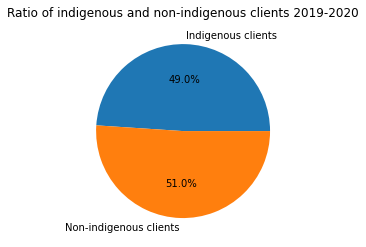

In [9]:
#Create plot comparing indigenous and non-indigenous clients in WA
labels = ["Indigenous clients", "Non-indigenous clients"]
plt.pie(clean_indigenous_df["Homeless clients"], labels = labels, autopct = "%1.1f%%")
plt.title("Ratio of indigenous and non-indigenous clients 2019-2020")
plt.show()

#Note: of 290,462 clients in the nation, 22,141 (7.6%) do not have a reported indigenous status.
#WA have 24,739 clients, or 8.5% of the nation's clients.

# Observations
1. Indigenous clients make up almost half of the total clients.